In [1]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd
import numpy as np

In [2]:
from lsst.daf.butler import Butler

In [10]:
refCat = pd.read_parquet('stack_projects/RC2_reruns/tmp_ref.parquet')
refCat_medEp = pd.read_parquet('stack_projects/RC2_reruns/tmp_medEp_ref.parquet')

In [11]:
butler = Butler('/repo/main', collections='u/csaunder/DM-37943/w11_wPM_shiftTest')
butler_medEp = Butler('/repo/main', collections='u/csaunder/DM-37943/w11_wPM_shiftTest_medEp')

In [12]:
fitStars = butler.get('gbdesAstrometricFit_fitStars', tract=9813, physical_filter='HSC-Z', skymap='hsc_rings_v1').to_pandas()
fitStars_medEp = butler_medEp.get('gbdesAstrometricFit_fitStars', tract=9813, physical_filter='HSC-Z', skymap='hsc_rings_v1').to_pandas()

In [13]:
gaia = fitStars.loc[fitStars['catalogNumber'] == 309]
gaia_medEp = fitStars_medEp.loc[fitStars_medEp['catalogNumber'] == 309]

In [14]:
gaiaCat = SkyCoord(ra=gaia['xpix'] * u.degree, dec=gaia['ypix'] * u.degree)
gaia_medEp_Cat = SkyCoord(ra=gaia_medEp['xpix'] * u.degree, dec=gaia_medEp['ypix'] * u.degree)
gaia_ref_Cat = SkyCoord(ra=refCat['ra']*u.degree, dec=refCat['dec']*u.degree)
gaia_refMedEp_Cat = SkyCoord(ra=refCat_medEp['ra']*u.degree, dec=refCat_medEp['dec']*u.degree)

In [15]:
id, d2d, d3d = gaiaCat.match_to_catalog_sky(gaia_medEp_Cat)
id2, d2d2, d3d = gaiaCat.match_to_catalog_sky(gaia_refMedEp_Cat)
id3, d2d3, d3d = gaiaCat.match_to_catalog_sky(gaia_ref_Cat)

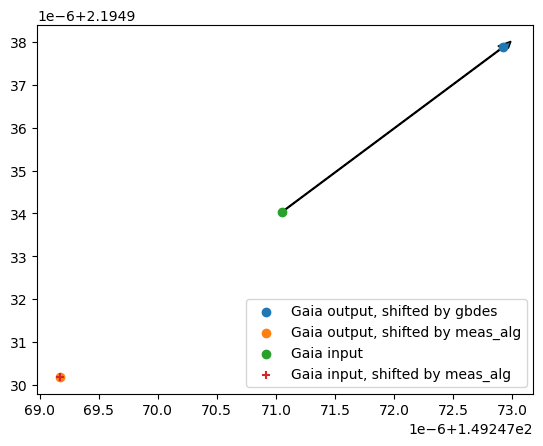

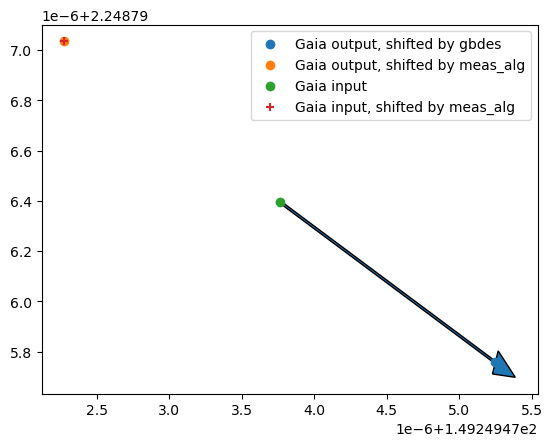

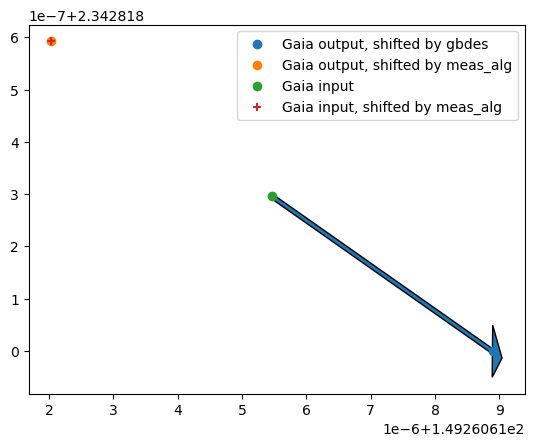

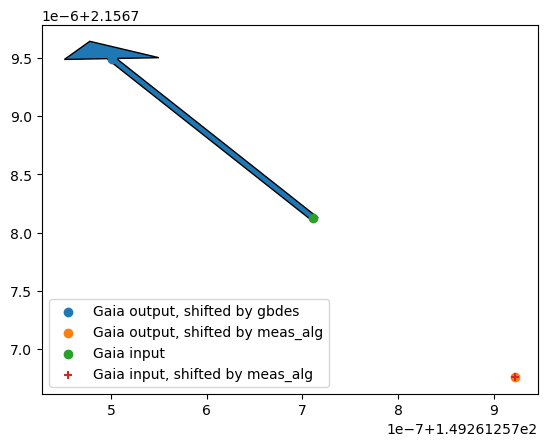

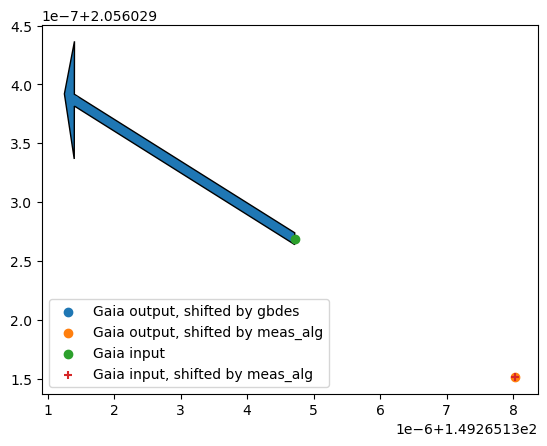

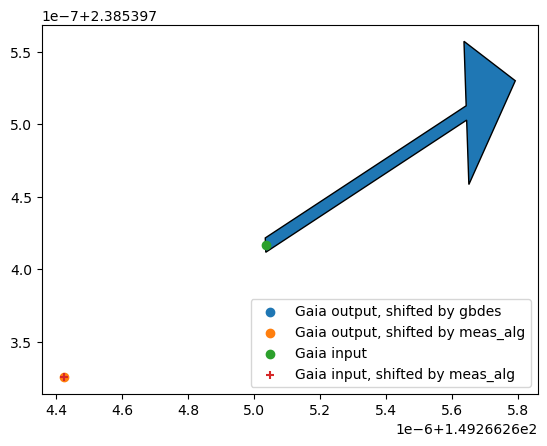

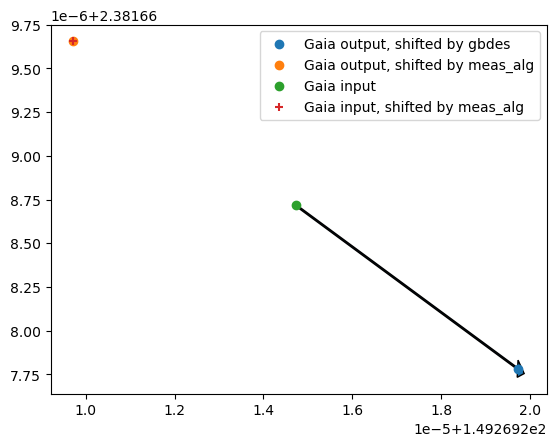

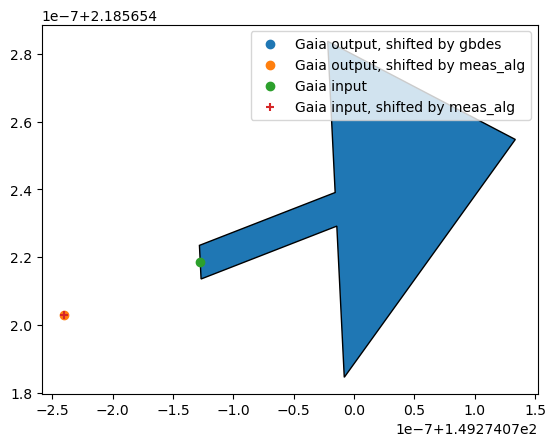

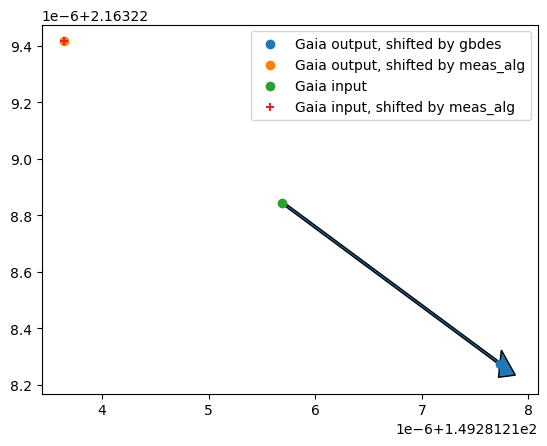

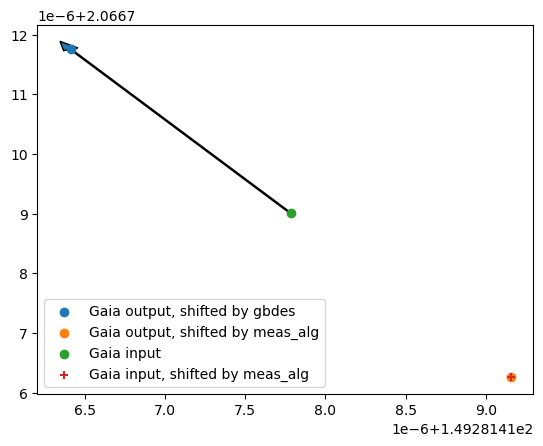

In [37]:
time_shift = -1.26362 # years
for i in range(10):
    plt.figure()
    plt.scatter(gaia['xpix'].iloc[i], gaia['ypix'].iloc[i], label='Gaia output, shifted by gbdes')
    plt.scatter(gaia_medEp.iloc[id[i]]['xpix'], gaia_medEp.iloc[id[i]]['ypix'], label='Gaia output, shifted by meas_alg')
    plt.scatter(refCat.iloc[id3[i]]['ra'], refCat.iloc[id3[i]]['dec'], label='Gaia input')
    plt.scatter(refCat_medEp.iloc[id2[i]]['ra'], refCat_medEp.iloc[id2[i]]['dec'], label='Gaia input, shifted by meas_alg', marker='+')
    dra = refCat.iloc[id3[i]]['raPM'] * time_shift / (1000 * 3600)
    ddec = refCat.iloc[id3[i]]['decPM'] * time_shift / (1000 * 3600)
    plt.arrow(refCat.iloc[id3[i]]['ra'], refCat.iloc[id3[i]]['dec'], dra, ddec, width=1e-8, head_width=1e-7, zorder=0)
    plt.legend()
    plt.show()